<a href="https://colab.research.google.com/github/paritoshkc/Computer-Vision-Project/blob/master/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


The three coordinates of LAB represent the lightness of
the color (L* = 0 yields black and L* = 100 indicates
diffuse white; specular white may be higher), its position
between red/magenta and green (a*, negative values
indicate green while positive values indicate magenta) and
its position between yellow and blue (b*, negative values indicate blue and positive values indicate yellow) coordinate ranges from 0 to 100.


/content/drive/My Drive/Colab Notebooks/Computer Vision/yoda.jpg


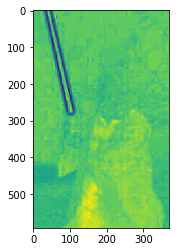

In [11]:
import numpy as np
from PIL import Image, ImageCms
import matplotlib.pyplot as plt
from scipy.ndimage import filters
%matplotlib inline

path_to_save='/content/drive/My Drive/Colab Notebooks/Computer Vision/'
path=path_to_save+'yoda.jpg'

def get_Image(path):
  
    # Open image and discard alpha channel which makes wheel round rather than square
  im = Image.open(path).convert('RGB')
  return im

def get_lab_color_system(image):
  # Convert to Lab colourspace
  srgb_p = ImageCms.createProfile("sRGB")
  lab_p  = ImageCms.createProfile("LAB")

  rgb2lab = ImageCms.buildTransformFromOpenProfiles(srgb_p, lab_p, "RGB", "LAB")
  Lab = ImageCms.applyTransform(image, rgb2lab)

  # Split into constituent channels so we can save 3 separate greyscales
  L, a, b = Lab.split()
  return L,a,b
  


print(path)
image_Src=get_Image(path)

plt.imshow(image_Src)

L,a,b=get_lab_color_system(image_Src)

L.save(path_to_save+'yoda_L.png')
a.save(path_to_save+'yoda_a.png')
b.save(path_to_save+'yoda_b.png')

plt.imshow(a)

Ix = I * Gx and Iy = I * Gy ,

/content/drive/My Drive/Colab Notebooks/Computer Vision/yoda.jpg


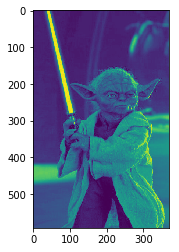

In [12]:
from scipy.ndimage import filters
import imageio
sigma = 0
print(path)

L=Image.open(path).convert('L')
im_x_array=np.array(L)
im_y_array=np.array(L)

imx = np.zeros(im_x_array.shape)
X_luminance=filters.gaussian_filter(im_x_array, (sigma,sigma), (0,1), imx)
plt.imshow(im_x_array)
imageio.imwrite(path_to_save+'yoda_L_x.jpg',X_luminance)


imy = np.zeros(im_y_array.shape)
Y_luminance=filters.gaussian_filter(im_y_array, (sigma,sigma), (1,0), imy)
imageio.imwrite(path_to_save+'yoda_L_y.jpg',Y_luminance)


plt.imshow(im_y_array)

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from PIL import Image
from google.colab.patches import cv2_imshow as sh

%matplotlib inline

path_to_save='/content/drive/My Drive/Colab Notebooks/Computer Vision/'
path=path_to_save+'yoda.jpg'


#img = cv2.imread(path)
#cv2.namedWindow(winname = "Grayscale Image", flags = cv2.WINDOW_NORMAL)
#print(L)


#hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
L,a,b=get_lab_color_system(get_Image(path))
#hist, xbins, ybins = np.histogram2d(a.ravel(),b.ravel(),[180,256],[[0,180],[0,256]])

def get_HSV_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return image
def get_Grey_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

#L,a,b=get_lab_color_system(get_HSV_image(path))
#H, a_edges, b_edges = np.histogram2d(a, b, bins=10)
heatmap, xedges, yedges = np.histogram2d(a,b, bins=50)
#plt.hist(L.ravel(),256,[0,256])
plt.show()

TypeError: ignored

The type of this input is <class 'numpy.ndarray'>
Shape: (400, 700)


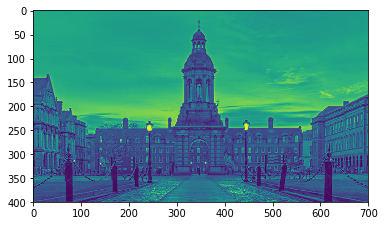

In [30]:
image = get_Grey_image('/content/drive/My Drive/Colab Notebooks/Computer Vision/TCD.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
[width,height]=image.shape
plt.imshow(image)